In [1]:
load("spam.rda")

In [2]:
dim(df)
head(df)

[1] 5574    3

,text,is_spam,words
,<chr>,<lgl>,<list>
1,"ham Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",FALSE,"Go , until , jurong , point , , crazy , , , Available, only , in , bugis , n , great , world , la , e , buffet , , , , Cine , there , got , amore , wat , ,"
2,ham Ok lar... Joking wif u oni...,FALSE,"Ok , lar , , , , Joking, wif , u , oni , ,"
3,spam Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,TRUE,"Free , entry , in , 2 , a , wkly , comp , to , win , FA , Cup , final , tkts , 21st , May , 2005 , , Text , FA , to , 87121 , to , receive , entry , question , std , txt , rate , T&C's , apply , 08452810075over18's"
4,ham U dun say so early hor... U c already then say...,FALSE,"U , dun , say , so , early , hor , , , , U , c , already, then , say , ,"
5,"ham Nah I don't think he goes to usf, he lives around here though",FALSE,"Nah , I , don't , think , he , goes , to , usf , , he , lives , around, here , though"
6,"spam FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",TRUE,"FreeMsg, Hey , there , darling, it's , been , 3 , week's , now , and , no , word , back , , I'd , like , some , fun , you , up , for , it , still , , Tb , ok , , XxX , std , chgs , to , send , , £1 , 50 , to , rcv"


In [3]:
length(common_words)
head(common_words)

[1] 630

[1] ""   "-"  "''" "\"" "*"  "&"

In [4]:
dim(wordmatrix)
head(wordmatrix)

[1] 5574  630

w_,w_-,w_'',"w_""",w_*,w_&,w_&amp;,w_&lt;#&gt;,w_&lt;DECIMAL&gt;,w_+,⋯,w_yet,w_Yo,w_you,w_You,w_YOU,w_you're,w_your,w_Your,w_yours,w_Yup
8,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0


In [5]:
library(rpart)

alldata <- data.frame(df$is_spam, wordmatrix)
names(alldata)[1] <- "is_spam"
ftree <- rpart(factor(is_spam)~., data=alldata)

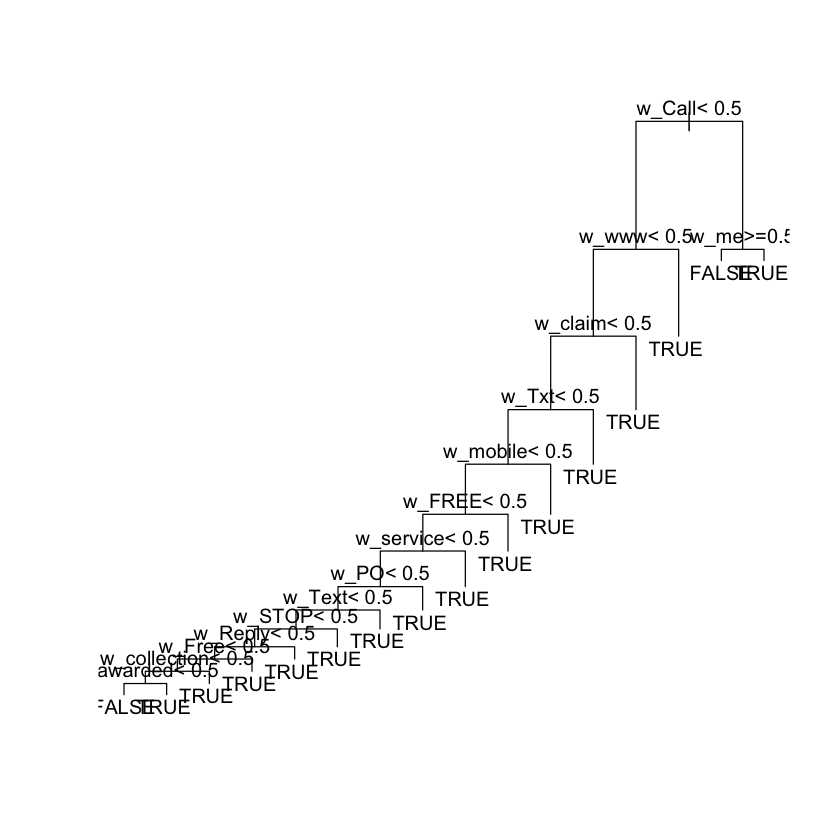

In [6]:
plot(ftree)
text(ftree)

The tree shape suggests a very simplistic decision process, biased toward TRUE unless a list of words are not present at all in the message. There generally need only be one instance of any one of the spammy words to mark a message as spam. The "tree" is quite imbalanced.

I would expect this problem to be much harder in real life than in this dataset. The dataset is quite limited, with only a few hundred spam messages and a few thousand real messages. Each message was also sourced from a few specific contexts, like inter-student communication at a specific university, whereas real world messages would come from many more contexts. For example, the word 'www' is considered a strong indicator of spam in this dataset. One can imagine many legitimate real world messages contain that word, so more specific indicators would need to be discovered to accurately predict legitimacy. Spam messages in the real world also constantly change, reworking their vocabulary to actively attempt to avoid classification as spam.